<a href="https://colab.research.google.com/github/SlyzingerBeta/Titanic/blob/main/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic
Predict which passengers are transported to an alternate dimension

### 1. Problem Definition
To predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

### 2. Data
To help us make these predictions, we're given a set of personal records recovered from the ship's damaged computer system.

### 3. Evaluation
Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

### 4. Features

Personal records for about two-thirds (~8700) of the passengers, to be used as training data:
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### 5. Modelling

Since we have to predict whether they are transported or not , this is a case of binary classfication problem.


In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
data=pd.read_csv("drive/MyDrive/spaceship-titanic-competition/train.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
len(data),data.shape

(8693, (8693, 14))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


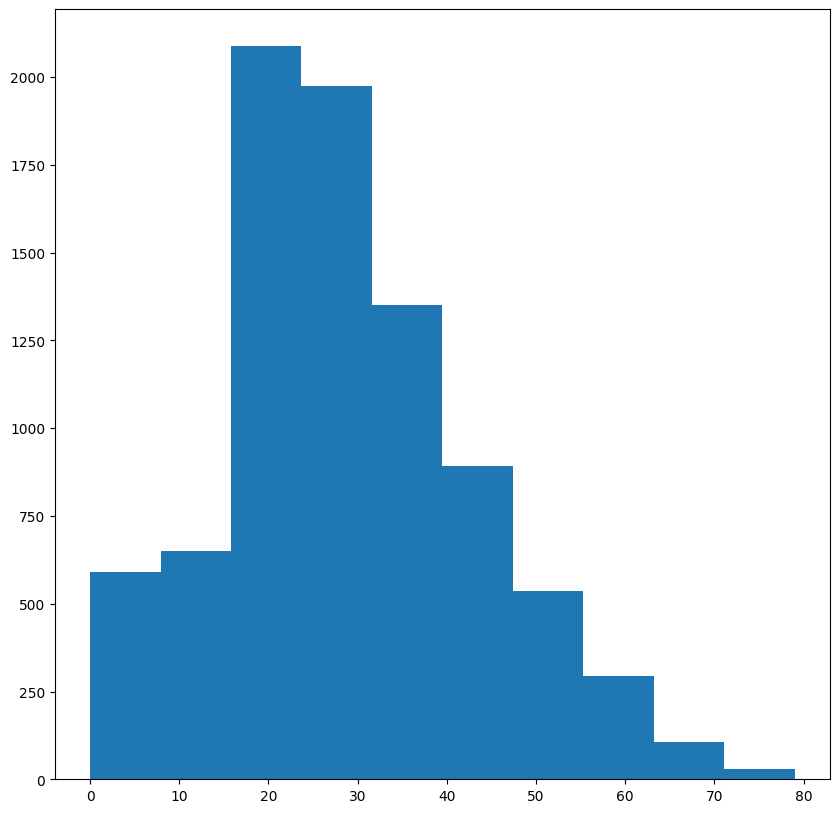

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
plt.hist(data["Age"]);

In [ ]:
data["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

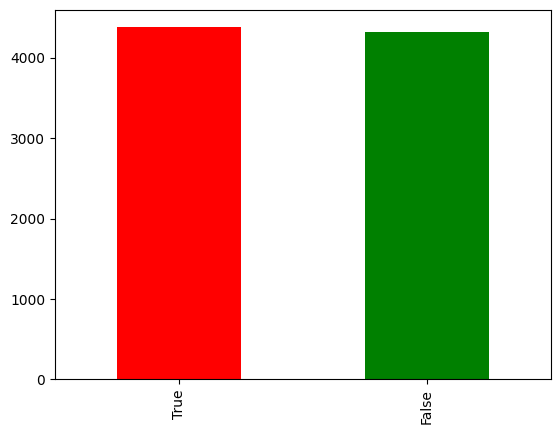

In [ ]:
data["Transported"].value_counts().plot(kind="bar",color=["red","green"]);

In [ ]:
data.isna().sum() # There are missing values in the data

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

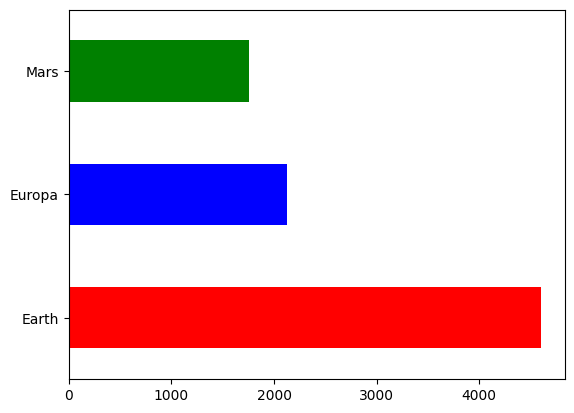

In [ ]:
data["HomePlanet"].value_counts().plot(kind="barh",color=["red","blue","green"])

In [ ]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
pd.crosstab(data.Transported,data.HomePlanet)

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2651,727,839
True,1951,1404,920


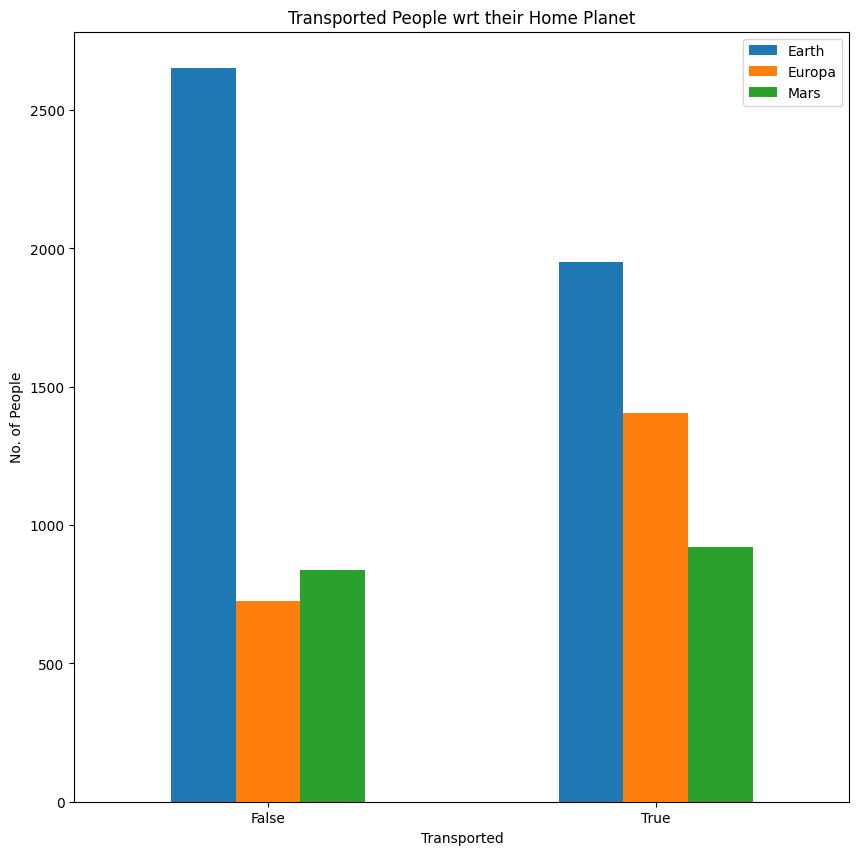

In [ ]:
pd.crosstab(data.Transported,data.HomePlanet).plot(kind="bar",figsize=(10,10))
plt.title("Transported People wrt their Home Planet")
plt.ylabel("No. of People")
plt.xticks(rotation=0)
plt.legend(["Earth","Europa","Mars"])

In [ ]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
data_temp=data.copy()

In [ ]:
data_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
data.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

#First let's fill the missing data

In [ ]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
# Finding out which categories have missing values...

numerical=[]
objects=[]
for label,content in data_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      numerical.append(label)
  elif pd.api.types.is_object_dtype(content):
    if pd.isnull(content).sum():
      objects.append(label)

In [ ]:
numerical

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
objects

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

In [ ]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# Let's fill the numeric rows with the median
for label,content in data_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us if data was missing
      data_temp[label+"_is_missing"]=pd.isnull(content)
      # Fill empty values with median
      data_temp[label]=content.fillna(content.median())

In [ ]:
data_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,False,False,False,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,False,False,False,False,False


In [ ]:
data_temp.isna().sum()

PassengerId                  0
HomePlanet                 201
CryoSleep                  217
Cabin                      199
Destination                182
Age                          0
VIP                        203
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                       200
Transported                  0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

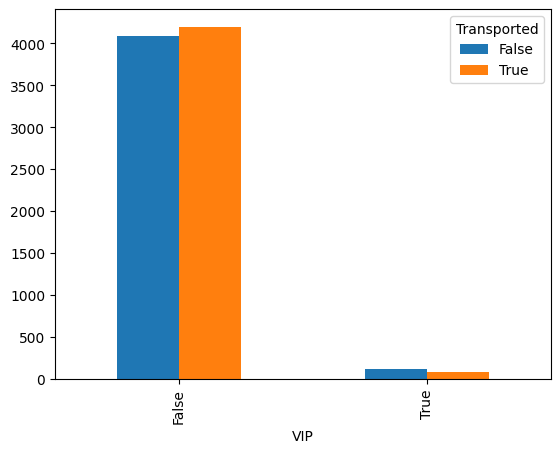

In [ ]:
pd.crosstab(data_temp["VIP"],data_temp["Transported"]).plot(kind="bar");

In [ ]:
data_temp.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
data_temp.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,False,False,False,False,False,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,False,False,False,False,False,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,False,False,False,False,False,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,False,False,False,False,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,False,False,False,False,False,False


In [ ]:
pd.Categorical(data_temp["Cabin"]).codes

array([ 149, 2184,    1, ..., 5285, 2131, 2131], dtype=int16)

In [ ]:
# Converting categorical data to numbers

for label,content in data_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us if data was missing
      data_temp[label+"_is_missing"]=pd.isnull(content)
      # Turn categories into numbers and add +1
      data_temp[label]=pd.Categorical(content).codes+1

In [ ]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              8693 non-null   object 
 1   HomePlanet               8693 non-null   int8   
 2   CryoSleep                8693 non-null   int8   
 3   Cabin                    8693 non-null   int16  
 4   Destination              8693 non-null   int8   
 5   Age                      8693 non-null   float64
 6   VIP                      8693 non-null   int8   
 7   RoomService              8693 non-null   float64
 8   FoodCourt                8693 non-null   float64
 9   ShoppingMall             8693 non-null   float64
 10  Spa                      8693 non-null   float64
 11  VRDeck                   8693 non-null   float64
 12  Name                     8693 non-null   int16  
 13  Transported              8693 non-null   bool   
 14  Age_is_missing          

In [ ]:
data_temp['PassengerId']=pd.Categorical(data_temp["PassengerId"]).codes

In [ ]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              8693 non-null   int16  
 1   HomePlanet               8693 non-null   int8   
 2   CryoSleep                8693 non-null   int8   
 3   Cabin                    8693 non-null   int16  
 4   Destination              8693 non-null   int8   
 5   Age                      8693 non-null   float64
 6   VIP                      8693 non-null   int8   
 7   RoomService              8693 non-null   float64
 8   FoodCourt                8693 non-null   float64
 9   ShoppingMall             8693 non-null   float64
 10  Spa                      8693 non-null   float64
 11  VRDeck                   8693 non-null   float64
 12  Name                     8693 non-null   int16  
 13  Transported              8693 non-null   bool   
 14  Age_is_missing          

In [ ]:
data_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,HomePlanet_is_missing,CryoSleep_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
0,0,2,1,150,3,39.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1,2185,3,24.0,1,109.0,9.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,2,2,1,2,3,58.0,2,43.0,3576.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,2,1,2,3,33.0,1,0.0,1283.0,371.0,...,False,False,False,False,False,False,False,False,False,False
4,4,1,1,2187,3,16.0,1,303.0,70.0,151.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check if there are any non-numerical columns
for label,content in data_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

In [ ]:
data_temp.isna().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Name                       0
Transported                0
Age_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
HomePlanet_is_missing      0
CryoSleep_is_missing       0
Cabin_is_missing           0
Destination_is_missing     0
VIP_is_missing             0
Name_is_missing            0
dtype: int64

In [ ]:
# Let's now remove unwanted columns from our data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
data_temp.drop("Name",axis=1,inplace=True)

In [ ]:
data_temp.head().T

,0,1,2,3,4
PassengerId,0,1,2,3,4
HomePlanet,2,1,2,2,1
CryoSleep,1,1,1,1,1
Cabin,150,2185,2,2,2187
Destination,3,3,3,3,3
Age,39.0,24.0,58.0,33.0,16.0
VIP,1,1,2,1,1
RoomService,0.0,109.0,43.0,0.0,303.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0


# MODEL

In [ ]:
# Now we have to split our data into train and validation set
x=data_temp.drop("Transported",axis=1)
y=data_temp["Transported"]

In [ ]:
x.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,HomePlanet_is_missing,CryoSleep_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
0,0,2,1,150,3,39.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1,2185,3,24.0,1,109.0,9.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,2,2,1,2,3,58.0,2,43.0,3576.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,2,1,2,3,33.0,1,0.0,1283.0,371.0,...,False,False,False,False,False,False,False,False,False,False
4,4,1,1,2187,3,16.0,1,303.0,70.0,151.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [ ]:
np.random.seed(42)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)

In [ ]:
# models={"Logistic Regression":LogisticRegression(),"Linear SVC":LinearSVC(),"KNN":KNeighborsClassifier(),"RandomForestClassifier":RandomForestClassifier()}

# def fit_and_score(model,x_train,x_test,y_train,y_test):
#   np.random.seed(42)
#   model_scores={}
#   for name ,model in models.items():
#     model.fit(x_train,y_train)
#     model_scores[name]=model.score(x_val,y_val)
#   return model_scores


In [ ]:
##fit_and_score(model=models,x_train=x_train,x_test=x_val,y_train=y_train,y_test=y_val)

In [ ]:
## Since the score of Linear SVC is much less as compared to others , we will leave it .

In [ ]:
# We will now try to vary the parameters and try to improve the score.

In [ ]:
data_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,HomePlanet_is_missing,CryoSleep_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
0,0,2,1,150,3,39.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1,2185,3,24.0,1,109.0,9.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,2,2,1,2,3,58.0,2,43.0,3576.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,2,1,2,3,33.0,1,0.0,1283.0,371.0,...,False,False,False,False,False,False,False,False,False,False
4,4,1,1,2187,3,16.0,1,303.0,70.0,151.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test_data=pd.read_csv("drive/MyDrive/spaceship-titanic-competition/test.csv")

In [ ]:
test_data_tmp=test_data.copy()

In [ ]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
# We can see that even the test data has missing data so we need to fill it.

In [ ]:
for label,content in test_data.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      test_data[label+"_is_missing"]=pd.isnull(content)
      test_data[label]=content.fillna(content.median())

In [ ]:
test_data.isna().sum()

PassengerId                  0
HomePlanet                  87
CryoSleep                   93
Cabin                      100
Destination                 92
Age                          0
VIP                         93
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                        94
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

In [ ]:
for label,content in test_data.items():
  if not pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      test_data[label+"_is_missing"]=pd.isnull(content)
      test_data[label]=pd.Categorical(content).codes+1


In [ ]:
test_data.isna().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Name                       0
Age_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
HomePlanet_is_missing      0
CryoSleep_is_missing       0
Cabin_is_missing           0
Destination_is_missing     0
VIP_is_missing             0
Name_is_missing            0
dtype: int64

In [ ]:
x_train.shape,x_val.shape

((6954, 24), (1739, 24))

In [ ]:
test_data.shape

(4277, 25)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              4277 non-null   object 
 1   HomePlanet               4277 non-null   int8   
 2   CryoSleep                4277 non-null   int8   
 3   Cabin                    4277 non-null   int16  
 4   Destination              4277 non-null   int8   
 5   Age                      4277 non-null   float64
 6   VIP                      4277 non-null   int8   
 7   RoomService              4277 non-null   float64
 8   FoodCourt                4277 non-null   float64
 9   ShoppingMall             4277 non-null   float64
 10  Spa                      4277 non-null   float64
 11  VRDeck                   4277 non-null   float64
 12  Name                     4277 non-null   int16  
 13  Age_is_missing           4277 non-null   bool   
 14  RoomService_is_missing  

In [ ]:
test_data["PassengerId"]=pd.Categorical(test_data["PassengerId"]).codes

In [ ]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,HomePlanet_is_missing,CryoSleep_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
0,0,1,2,2785,3,27.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1,1868,3,19.0,1,0.0,9.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2,2,2,258,1,31.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,2,1,260,3,38.0,1,0.0,6652.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,4,1,1,1941,3,20.0,1,10.0,0.0,635.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_test=test_data.drop("Name",axis=1)

In [ ]:
x_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,HomePlanet_is_missing,CryoSleep_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
0,0,1,2,2785,3,27.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1,1868,3,19.0,1,0.0,9.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2,2,2,258,1,31.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,2,1,260,3,38.0,1,0.0,6652.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,4,1,1,1941,3,20.0,1,10.0,0.0,635.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# np.random.seed(42)
# model_1=LogisticRegression()
# y_preds=model_1.fit(x_train,y_train)

In [ ]:
# model_1.score(x_val,y_val)

In [ ]:
# y_preds=model_1.predict(x_test)

In [ ]:
# y_preds

In [ ]:
# preds_df=pd.DataFrame(columns=["PassengerId"]+["Transported"])

In [ ]:
# preds_df["PassengerId"]=test_data_tmp["PassengerId"]

In [ ]:
# preds_df["Transported"]=y_preds

In [ ]:
# preds_df

In [ ]:
# preds_df.to_csv("drive/MyDrive/spaceship-titanic-competition/submission-file-1-logisticsregression.csv",index=False)

In [ ]:
# preds_df=pd.read_csv("drive/MyDrive/spaceship-titanic-competition/submission-file-1-logisticsregression.csv")

In [ ]:
# preds_df

In [ ]:
# model_2=RandomForestClassifier()
# model_2.fit(x_train,y_train)

In [ ]:
# model_2.score(x_val,y_val)

In [ ]:
# y_preds_1=model_2.predict(x_test)

In [ ]:
def submission_file(y_preds):
  preds_df=pd.DataFrame(columns=["PassengerId"]+["Transported"])
  preds_df["PassengerId"]=test_data_tmp["PassengerId"]
  preds_df["Transported"]=y_preds
  return preds_df

In [ ]:
# preds_df_1=submission_file(y_preds_1)

In [ ]:
# preds_df_1.to_csv("drive/MyDrive/spaceship-titanic-competition/submission-file-2-rfc.csv",index=False)

In [ ]:
# preds_df_1=pd.read_csv("drive/MyDrive/spaceship-titanic-competition/submission-file-2-rfc.csv")

In [ ]:
# preds_df_1

In [ ]:
# preds_df_1.Transported.value_counts()

In [ ]:
# preds_df_1.isna().sum()

In [ ]:
# Since we received a better score on RandomForestClassifier we will now try to tune Hyperparameters to improve our score.

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
hyperparams={"n_estimators":[int(x) for x in np.linspace(start=200,stop=2000,num=10)],
            "max_features":['auto','sqrt'],
             "max_depth":[int(x) for x in np.linspace(10, 110, num = 11)],
             "min_samples_split":[2,5,10],
             "min_samples_leaf":[1,2,4]}

In [ ]:
hyperparams

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
# model_random=RandomizedSearchCV(estimator=model,param_distributions=hyperparams,n_iter=100,cv=5,verbose=1,random_state=42,n_jobs=-1)
# model_random.fit(x_train,y_train)

In [ ]:
# model_random.best_params_

In [ ]:
# model_random.score(x_val,y_val)

In [ ]:
# y_preds_random=model_random.predict(x_test)

In [ ]:
# y_preds_random

In [ ]:
# preds_df_random=submission_file(y_preds_random)

In [ ]:
# preds_df_random.Transported.value_counts()


In [ ]:
# preds_df_random

In [ ]:
# preds_df_random.to_csv("drive/MyDrive/spaceship-titanic-competition/submission-file-3-rfcrs.csv",index=False)

In [ ]:
# preds_df_random=pd.read_csv("/content/drive/MyDrive/spaceship-titanic-competition/submission-file-3-rfcrs.csv")

In [ ]:
# preds_df_random

In [ ]:
model.fit(x_train,y_train)
model.score(x_val,y_val)

0.7786083956296722

In [ ]:
hyperparams={"n_estimators":[int(x) for x in np.linspace(start=200,stop=1000,num=10)],
            "max_features":['sqrt'],
             "max_depth":[int(x) for x in np.linspace(10, 100, num = 10)],
             "min_samples_split":[2,5],
             "min_samples_leaf":[1,2]}

In [ ]:
model_grid=GridSearchCV(estimator=model,param_grid=hyperparams,cv=5,verbose=1,scoring='accuracy')

In [ ]:
model_grid.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 42, 55, 67, 80],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 288, 377, 466, 555, 644, 733,
                                          822, 911, 1000]},
             scoring='accuracy', verbose=1)

In [ ]:
model_grid.best_params_

{'max_depth': 55,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
model_grid.score(x_val,y_val)

0.7866589994249569

In [ ]:
y_preds_grid=model.predict(x_test)

In [ ]:
y_preds_grid

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
y_preds_grid=submission_file(y_preds_grid)

In [ ]:
y_preds_grid

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
y_preds_grid.to_csv("drive/MyDrive/spaceship-titanic-competition/submission-file-4-rfcgs.csv",index=False)

In [ ]:
y_preds_grid=pd.read_csv("drive/MyDrive/spaceship-titanic-competition/submission-file-4-rfcgs.csv")

In [ ]:
y_preds_grid

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
